In [4]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the wine dataset
data = pd.read_csv('winequality-red (1).csv')

# Displaying the first few rows of the dataset
print(data.head())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [5]:
# Overview of dataset information
print(data.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


In [6]:
# Checking for missing values
print(data.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


**UNIVARIATE ANALYSIS**

In [7]:
# Summary statistics of numerical variables
print(data.describe())


       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

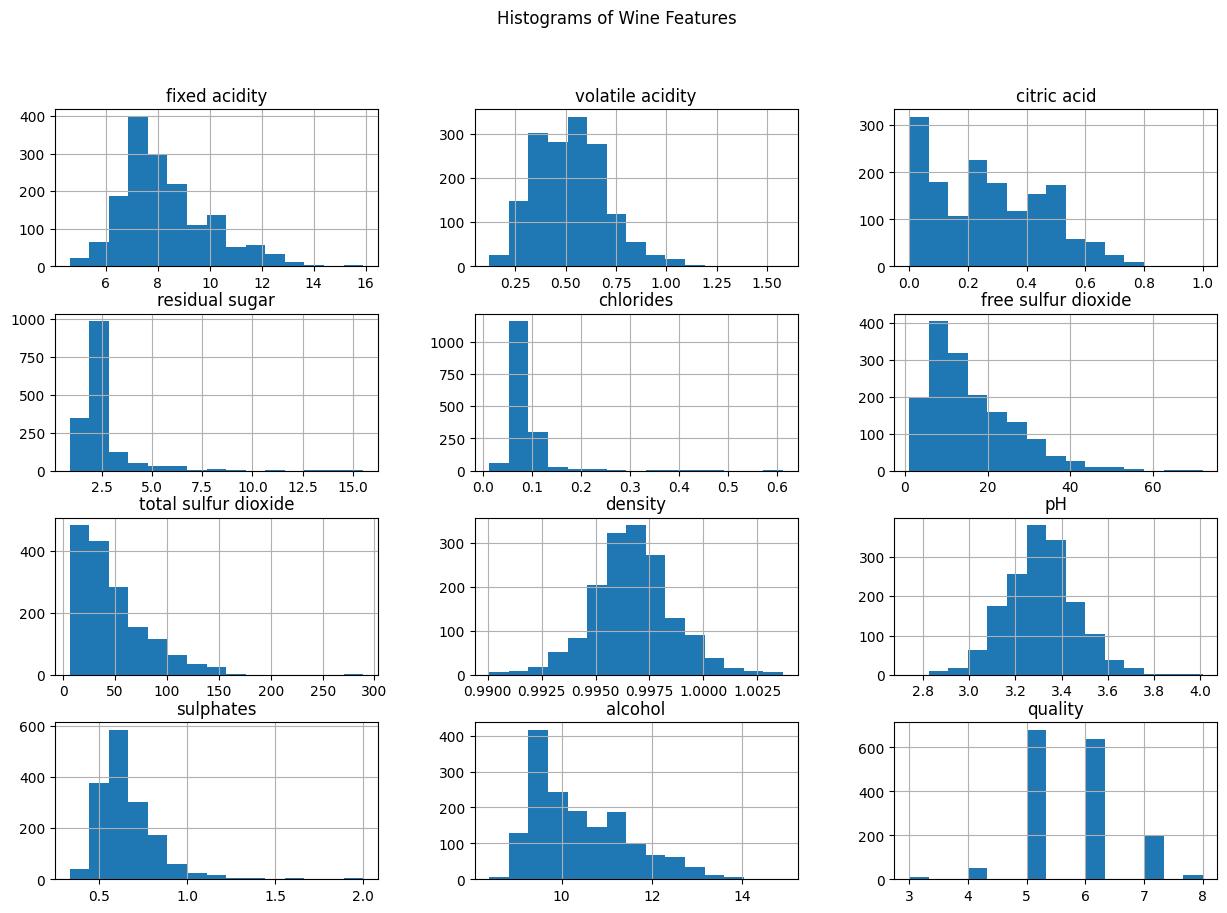

In [8]:
# Histograms for numerical variables
data.hist(bins=15, figsize=(15,10))
plt.suptitle('Histograms of Wine Features')
plt.show()


We can observe from that most of the features are left skewed(except alcochol and quality)

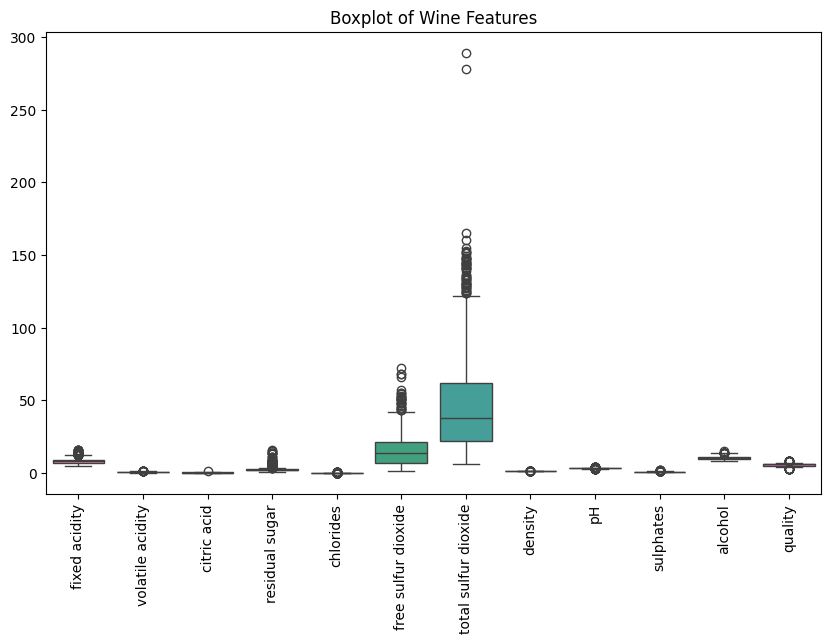

In [9]:
# Creating Boxplot for detecting outliers in key variables
plt.figure(figsize=(10,6))
sns.boxplot(data=data)
plt.xticks(rotation=90)
plt.title('Boxplot of Wine Features')
plt.show()

The boxplot shows that variables like residual sugar, chlorides sulphates, sulfer dioxide may contain some outliers.


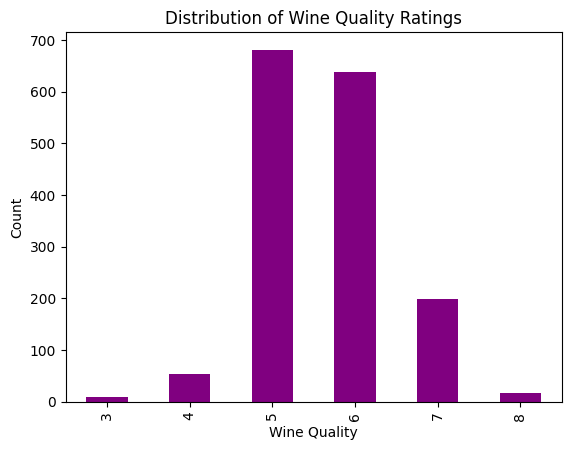

In [10]:
# Creating Bar chart for the 'quality' variable (target)
data['quality'].value_counts().sort_index().plot(kind='bar', color='purple')
plt.title('Distribution of Wine Quality Ratings')
plt.xlabel('Wine Quality')
plt.ylabel('Count')
plt.show()

The quality variable is categorical, with most wines receiving a score between 5 and 7.


**MULTIVARIABLE ANALYSIS**

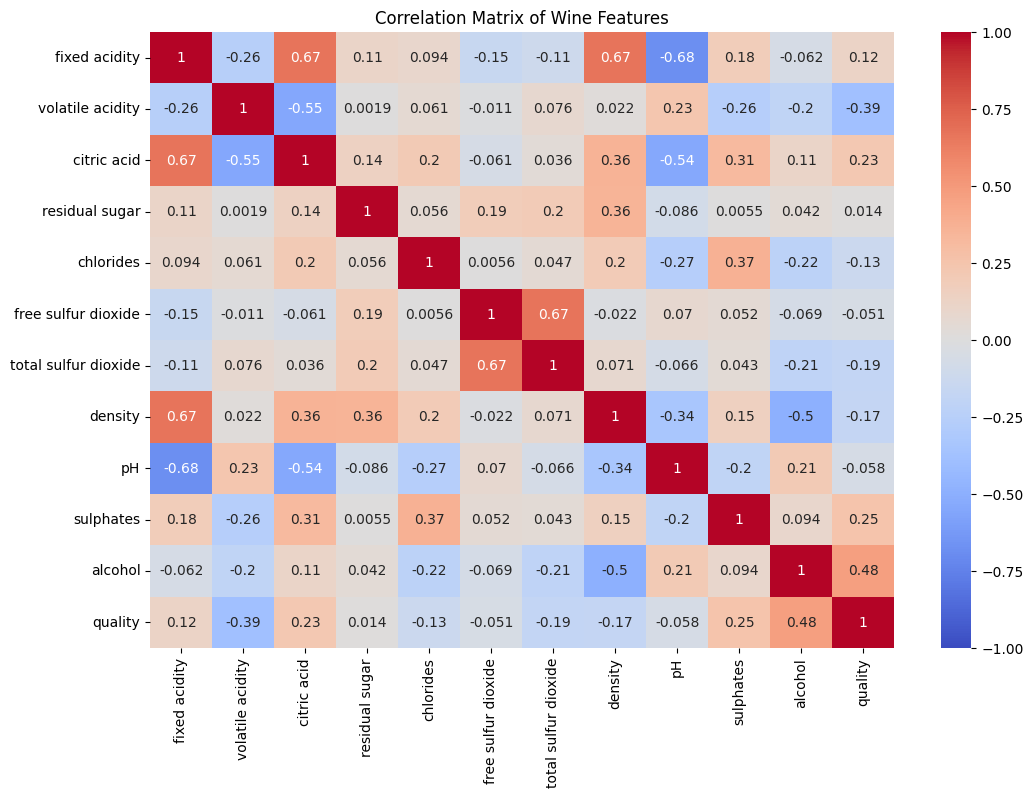

In [11]:
# Computing the correlation matrix
corr_mat = data.corr()

# Display the heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Wine Features')
plt.show()


A correlation matrix shows the relationship between numerical variables, helping us to understand which features are positively or negatively correlated with wine quality.

 **Observations from Correlation Matrix:**
Alcohol shows a moderate positive correlation with quality (the higher the alcohol content, the higher the wine quality score).
Volatile acidity shows a moderate negative correlation with quality (higher acidity is associated with lower quality).
Sulphates and citric acid also have slight positive correlations with wine quality.

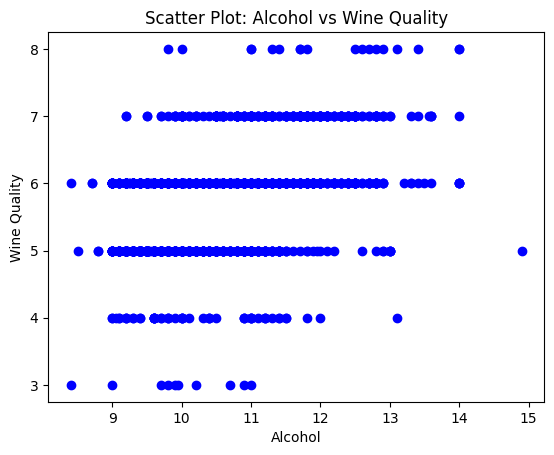

In [12]:
#create scatter plots to explore relationships between key variables and wine quality.
# Scatter plot1: Alcohol vs Quality
plt.scatter(data['alcohol'], data['quality'], color='blue')
plt.title('Scatter Plot: Alcohol vs Wine Quality')
plt.xlabel('Alcohol')
plt.ylabel('Wine Quality')
plt.show()

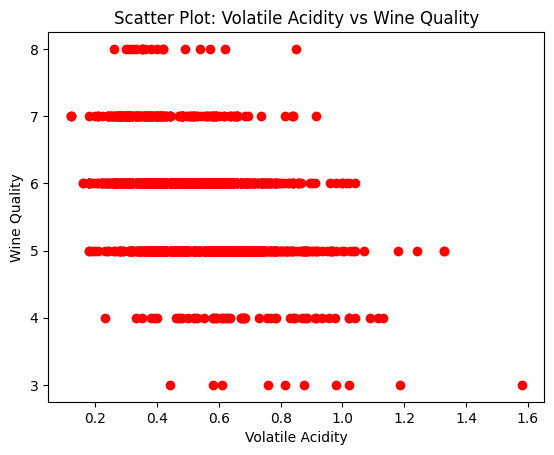

In [13]:
# Scatter plot: Volatile Acidity vs Quality
plt.scatter(data['volatile acidity'], data['quality'], color='red')
plt.title('Scatter Plot: Volatile Acidity vs Wine Quality')
plt.xlabel('Volatile Acidity')
plt.ylabel('Wine Quality')
plt.show()

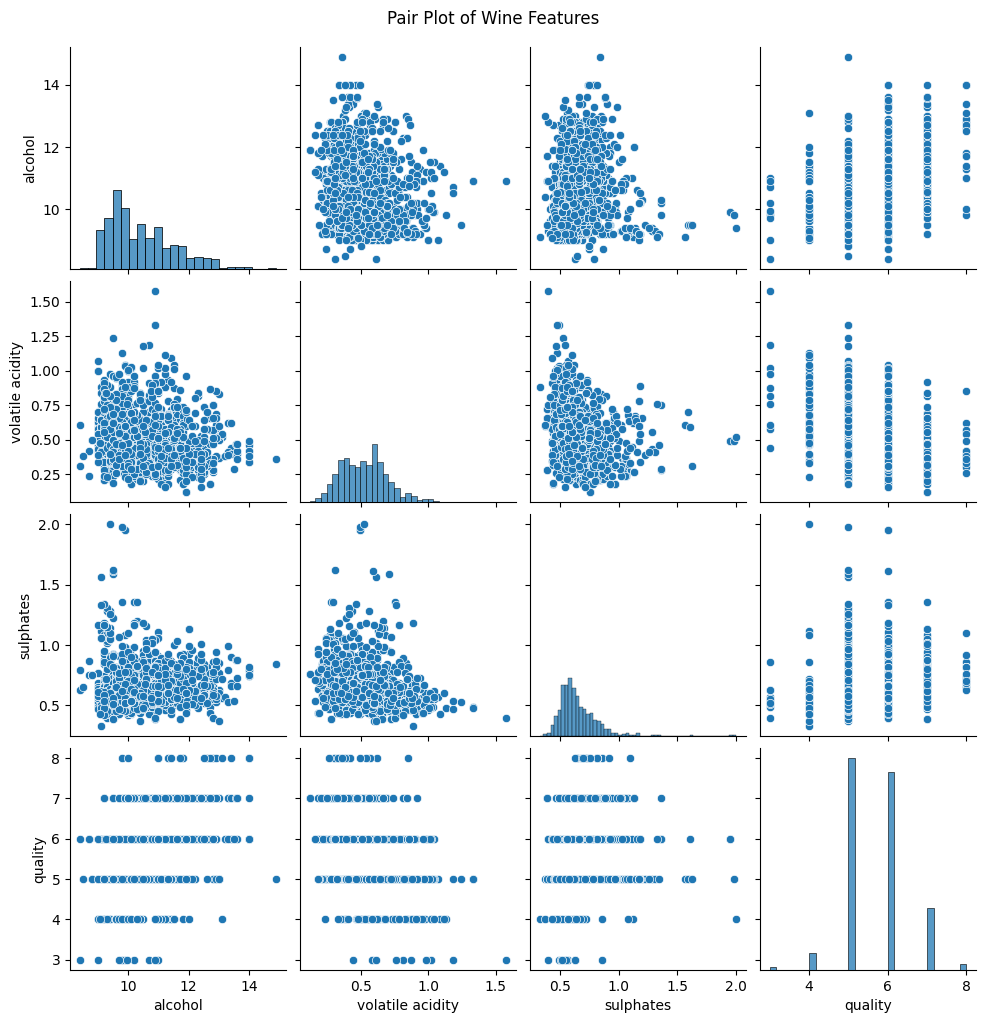

In [14]:
# Pair plot for a subset of variables
sns.pairplot(data[['alcohol', 'volatile acidity', 'sulphates', 'quality']])
plt.suptitle('Pair Plot of Wine Features', y=1.02)
plt.show()


Alcohol and sulphates seem to have positive correlations with quality, as evident from the scatter plots.

Volatile acidity tends to have a negative impact on quality.


The pair plot confirms that certain variables like alcohol and sulphates are more strongly associated with higher wine quality.





In [15]:
#let us dive deeper into how different features correlate with wine quality using the correlation matrix and feature selection techniques.
correlation_with_quality = data.corr()['quality'].sort_values(ascending=False)
print(correlation_with_quality)


quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64


Observations:
Alcohol will likely be at the top of the list (positive correlation).

Volatile acidity will be near the bottom (negative correlation).

Other significant variables like sulphates, citric acid, and total sulfur dioxide will have varying levels of correlation.